# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:

# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


### Data  Exploration

In [4]:
data[:5]

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

In [5]:
prices[:5]

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [6]:
features[:5]

RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7

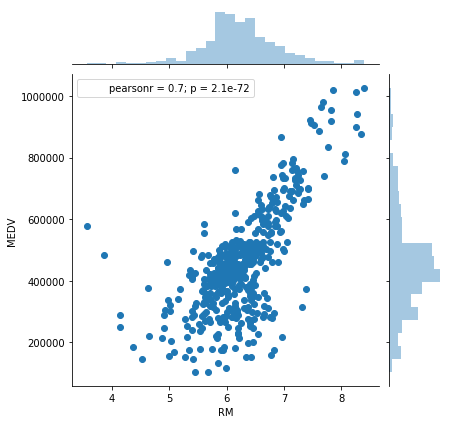

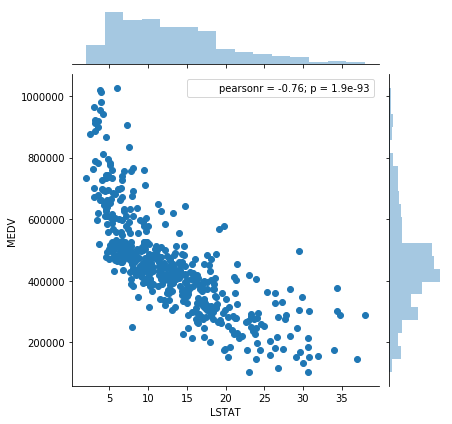

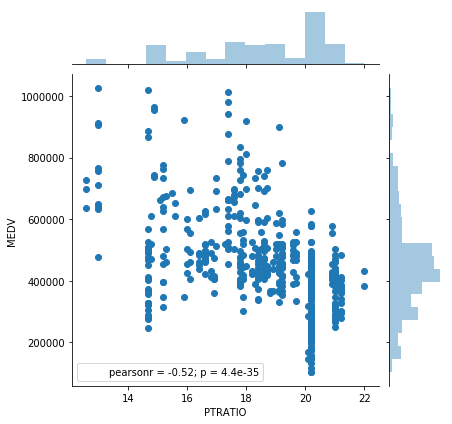

In [7]:
import seaborn as sns
sns.jointplot(x='RM', y='MEDV',data=data)
sns.jointplot(x='LSTAT', y='MEDV',data=data)
sns.jointplot(x='PTRATIO', y='MEDV',data=data)

In [8]:

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price =np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
Do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'?

Would you expect a house that has an 'RM' value (number of rooms) of 6 to be more or less than a house that has an 'RM' value of 7? 

**Answer**

A house with a higher number of RM has a higher of the MEDV value. We can see it in rows 4 and 5 of the index column. 
There is a correlation between the number of rooms with the increase in the value of a house because there is more space, therefore the house is bigger

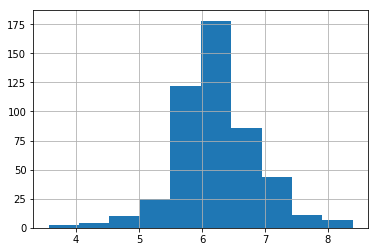

In [9]:
data["RM"].hist()

Justify my answer

In [10]:
data.iloc[4:6,:]

RM  LSTAT  PTRATIO      MEDV
4  7.147   5.33     18.7  760200.0
5  6.430   5.21     18.7  602700.0

Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?

**Answer**

The large percentage of low-income families is correlated with the decrease in the price of a home because they could hardly afford improvements in housing, therefore the price of a house is lower than the home that has improvements.

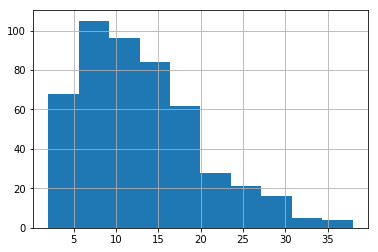

In [11]:
data["LSTAT"].hist()

In [12]:
print data.iloc[376:377]
print data.iloc[384:385]

        RM  LSTAT  PTRATIO      MEDV
376  6.193  15.17     20.2  289800.0
        RM  LSTAT  PTRATIO      MEDV
384  6.343  20.32     20.2  151200.0


Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?

**Answer**

In general there is an increase in the value of MEDV although there are exceptions as we can see below, the price of MEDV is lower:

This decrease in the price of housing could be due to the fact that, an increase in the number of students per teacher creating larger number public schools, generating parking traffic problems and less privacy.

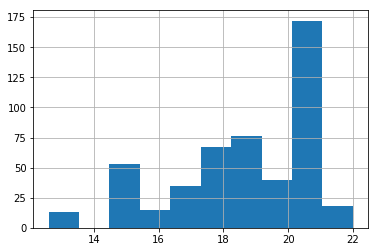

In [13]:
data["PTRATIO"].hist()

In [14]:
print data.iloc[250:251]
print data.iloc[182:183]

        RM  LSTAT  PTRATIO      MEDV
250  6.842    6.9     13.0  632100.0
        RM  LSTAT  PTRATIO      MEDV
182  6.782   6.68     15.2  672000.0


In [15]:
print data[323:324]

       RM  LSTAT  PTRATIO      MEDV
323  6.31   6.75     20.2  434700.0


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [16]:
from sklearn.metrics import r2_score
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

In [17]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


Would you consider this model to have successfully captured the variation of the target variable?

Why or why not?

** Answer**

The model of coefficient of determination known in statistics as R ^ 2 successfully captures the variation of the target variable.
 
Why?

If we have n points of coordinates (x, y) and through those points we find a line that minimizes the square of the distance of those points is known as "Square Error".

The Square Error is obtained by taking the value of y from each point minus the value of y on the line and the result obtained from the difference of y's is added to the square.

We already have a variation in y but we want to know, What percentage of the variation in y is described by the variation in x? So the "Total variation in y" is the square error of the vertical distance between the y point and the line that is given by the arithmetic mean "Mean".

So if we divide the Total Variation in and between n we will get what is known as the Variance of y (sigma ^ 2), which is the average of the squared distances.

Now we see it this way. How much of the total variation is NOT described by the regression line?

That percentage that is not described is; the quotient of the Square Error of the line divided the Square Error of the mean of y this division establishes that the percentage of the total variation is not described by the variation in x.

R ^ 2 = 1 - (EC straight / EC mean y)

R^2 = 92.3%

It means that when the value of square R is closer to the value 1, in this case 100%, the coefficient of determination is optimal.
We say that, the Error value of the Linear Regression between the Error of the Media is a value near 0. Therefore, consider that our model has successfully.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
Split the data into 80% training and 20% testing.
Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
Assign the train and testing splits to X_train, X_test, y_train, and y_test

In [18]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=20)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
Hint: Think about how overfitting or underfitting is contingent upon how splits on data is done.

##### Answer:

If we want our model to make predictions, it is necessary to have a way to evaluate its accuracy, reliability and credibility. However, because future instances have unknown target values, we need to use some of the data that we already know. One strategy is to take all the available tagged data and divide them into subsets of training and evaluation generally with a 70-80 percent proportion for training and 20-30 percent for evaluation.

Amazon ML. (February, 2018) https://docs.aws.amazon.com/machine-learning/latest/dg/splitting-the-data-into-training-and-evaluation-data.html

Stanford Systems. (February, 2018) https://info.salford-systems.com/blog/bid/337783/Why-Data-Scientists-Split-Data-into-Train-and-Test

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

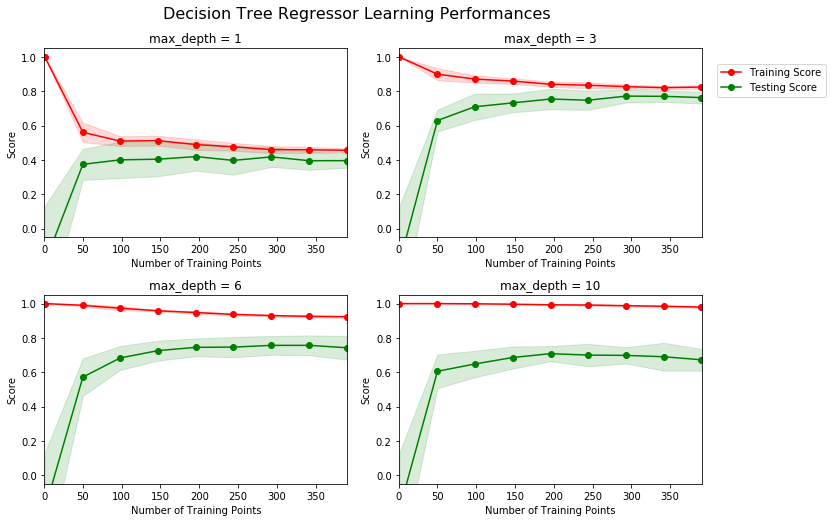

In [19]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
Choose one of the graphs above and state the maximum depth for the model.

What happens to the score of the training curve as more training points are added? 
What about the testing curve?
Would having more training points benefit the model?

Hint: Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary? Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

#### Answer:
Choose one of the graphs above and state the maximum depth for the model.

I choose the graph with themaximum depth = 3

In the graph with the parameter max_depth = 3, the score training curve converges to 0.8 approximately with 300 number of Training Points. If we observe the reference curve, it does not converge with a score above the benchmark threshold, so it is not necessary to increase it. In the test score curve in the first 50 points has an increase from 0 to 0.6, later while adding more points have very small increments. The rate of change on different amount of training data is really small.

#### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

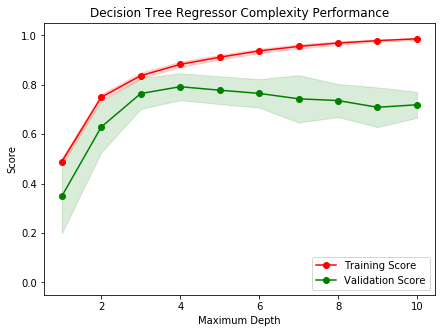

In [20]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff

When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?

How about when the model is trained with a maximum depth of 10? 

What visual cues in the graph justify your conclusions?

Hint: High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

#### Answer:        

A model with max_depht = 1 has low variance but does not necessarily mean that the model has a high bias because the training score curve and the validation score are very close. We also observe that when increasing the Maximum Depth the complexity curves (Training score, Validation score) begin to separate from point 4 keeping the low variance between the points of Maximum Depth from 1 to 4.
There is an increase in the Error of both Curves of Variation Score and Training score approximately from points 0.3 to 0.7 located on the Score axis.


A model with max_depth = 10 delivers a model with high variance that is a sign of overfiting (model is by-hearting the data and can not generalize well) I think that the model with max_depth = 10 does not align or converge at any point.
From the point 4 of the axis of Maximum Profundity the Variation score curve Error begins to have a small decrease, while the Error of the Training score curve continues to have a small increase, this results in that they are separating and not converge


### Question 6 - Best-Guess Optimal Model
Which maximum depth do you think results in a model that best generalizes to unseen data?

What intuition lead you to this answer?

#### Answer: 
The model that best fits has a maximum depth of 3 so we can consider it is the model that best generalizes

Because we get a higher score 0.8 approximately

### Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

### Question 7 - Grid Search
What is the grid search technique?

How it can be applied to optimize a learning algorithm?


#### Answer:
What is the grid search technique?

How can it be applied to optimize a learning algorithm?

Answer:

1.- The grid search is a technique that scans the data to configure the optimal parameters for a given model. It uses "brute force" to generate models for each combination of parameters, and is usually done together with cross-validation to determine which set of parameters offers the best performance by some type of score metric. The model evaluates the performance by checking each combination (external or Cartesian product of the matrix) one at a time, in the process, the model verifies this for all the parameters. For each of the combinations of parameters, during the search of the grid, verify the performance using cross validation by calculating the score and select the combination that has the best performance metric.

2.- Propose different values of training in gamma like 0.1, 1, 10 or 1000 and different models in kernel example "linear" and "polymial" after using the set of cross validation to calculate the F1 score of all the models and then choose the highest value of F1 scor Finally we make our training set to make sure it was done correctly



Are we adjusting parameters or hyperparameters?

* We are adjusting Hyperparameters. "The Hyper-parameters are parameters that are not directly learnt within estimators".

GridSearchCV, (February, 2018). http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html




What is the difference?

* The parameters of the a priori distributions are called hyperparameters, to distinguish them from the parameters of the model. For example, if you are using a beta distribution to model the distribution of the p parameter, then:


    p is a parameter of a Bernoulli distribution, and 
    
    α and β are parameters of the a priori distribution (beta distribution), and therefore hyperparameters

Probability a priori. (Frebruary, 2018). https://es.wikipedia.org/wiki/Probability_a_priori



* How do we “search” for the best combination of hyperparameters?

    The grid search technique uses the procedure that consists in constructing a bounded mesh of vectors of parameters containing all the possible combinations in a limited search space. Because it is necessary to use some measure of the performance of the SVM, cross-validation of n partitions by way of  parameter vector chosen  is the one for which the validation error is less.
    
Ricardo E. Seleccion deHiperparametros en SVM. (Mayo, 2004) http://www.bdigital.unal.edu.co/2018/1/ricardohenao.2004.pdf    

### Question 8 - Cross-Validation
What is the k-fold cross-validation training technique?

What benefit does this technique provide for grid search when optimizing a model?

Hint: When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon using a particular subset of data for training or testing and how k-fold cv could help alleviate that. You can refer to the docs for your answer.

#### Answer:

1.- Divide randomly into k subsamples and take one and hold it as validation data to test the model. The remaining k-1s are used     as training data. This process is repeated k times and the results average them to deliver an estimate.

2.- An advantage is that the method is used for both training and validation


* Which data set will be divided by GridSearchCV, the complete data set or just the training data set 
(Suggestion: reg = fit_model (X_train, y_train))?

The data set is divided from the training data set


* If we use the default Kfold method, will the data be randomly or sequentially divided?

Split dataset into k consecutive folds (without shuffling by default).



* Why is cross-validation of K-fold useful for searching for grids?


The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

parameter cv = int, cross-validation generator or an iterable, optional

Determines the cross-validation splitting strategy. Possible inputs for cv are:


integer, to specify the number of folds in a (Stratified) KFold,

An iterable yielding train, test splits.

For integer / None inputs, if the estimator is a classifier and and is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.


* What are the main drawbacks of searching for grids that are based on the use of this particular method and how k-fold cv could help alleviate that?


Could be generate errors if the data set is very large and if you do not have enough memory.



### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In addition, you will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). While it is not the K-Fold cross-validation technique you describe in Question 8, this type of cross-validation technique is just as useful!. The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18. For the fit_model function in the code cell below, you will need to implement the following:

Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.
Assign this object to the 'regressor' variable.

Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.
Use make_scorer from sklearn.metrics to create a scoring function object.

Pass the performance_metric function as a parameter to the object.

Assign this scoring function to the 'scoring_fnc' variable.

Use GridSearchCV from sklearn.grid_search to create a grid search object.

Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.

Assign the GridSearchCV object to the 'grid' variable.

In [21]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size = 0.20, random_state = 0)


    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
What maximum depth does the optimal model have? How does this result compare to your guess in Question 6?

In [22]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


#### Answer:
How does this result compare to your guess in Question 6?

Is different by a unit, in question 6 there is a max_depth = 3 and in the previous code it tells us that the optimal parameter is max_depth = 4

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

Feature                                     Client 1	  Client 2	 Client 3
Total number of rooms in home	             5 rooms	   4 rooms	  8 rooms
Neighborhood poverty level (as %)	           17%	         32%	    3%
Student-teacher ratio of nearby schools	     15-to-1	   22-to-1	  12-to-1

1.- What price would you recommend each client sell his/her home at?

2.- Do these prices seem reasonable given the values for the respective features?

Hint: Use the statistics you calculated in the Data Exploration section to help justify your response. Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

In [23]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $306,337.50
Predicted selling price for Client 2's home: $224,342.55
Predicted selling price for Client 3's home: $930,490.91



|     Clinet     |     RM     |      LSTAT       | PTRATIO         |     PSPH       |
| :------------: |:---------: |:---------------: | :-------------: | :-----------: |
| Client 1       |     5      |       17%        |       15        |   306,337.50  |
| Client 2       |     4      |       32%        |       22        |   224,342.55  |
| Client 3       |     8      |        3%        |       12        |   930,490.91  |

PSP: Predicted Selleng Price Home

In [24]:
import seaborn as sns
sns.pairplot(data, palette="Set2", size=2.5)

We are going to see the results that we have comparing it with those of the Exploration Section:

**Answer** 


These prices appear to be reasonable according to the number of rooms, the poverty level of the neighborhood and the student-teacher ratio. The higher rooms, the lower poverty level and the lower student-teacher ratio result in a higher sales price.

**Client 1:** the prediction is close to the average prices considering the number of rooms and level of poverty that the house has, this type of housing could be considered typical.

**Client 2:** The sale price of this home is lower because it has a smaller number of rooms and a higher level of poverty and the student-teacher ratio is also high, this type of housing could be considered within the neighborhoods with less prosperity .

**Client 3:** the sale price for this home is near the top of the high price range, because it has 8 rooms and is located in a prosperous neighborhood with a lower poverty level and a low student to teacher ratio.

#### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [25]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.
Hint: Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

How relevant today is data that was collected from 1978? How important is inflation?
Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
Is the model robust enough to make consistent predictions?
Would data collected in an urban city like Boston be applicable in a rural city?
Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

1.- How relevant today is data that was collected from 1978? How important is inflation?

2.- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the     home, square feet of the plot area, presence of pool or not etc should factor in?

3.- Is the model robust enough to make consistent predictions?

4.- Would data collected in an urban city like Boston be applicable in a rural city?

5.- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

#### Answer:

1.- In 1978 the conditions of the prices of a house could be different, that is to say that the conditions of some characteristics are no longer so important as to determine the price of a house even if we include the inflationary factor and update the values would not change the fact that the data collected in 1978 could not accurately determine the current prices of a house, it may also be that they have included some other features that influence the price of a home

2.- In general terms, the result can be translated into an approximation of the price of a home. However that approach can have     a better acurency if it includes more features, for example; more area in the front as well as in the backyard, if there is     a garage for more than two cars, the time since it was built, if it has a pool etc.

3.- During our sensitivity study, we observed that the predictions of our model had a range of 73,357.39 The prediction has a fluctuation ranging from 391,183.33 to 413,700.00

4.- Definitely you can not apply the same Boston database to make a prediction in a rural city. The price of a home is different     in a city like Boston than a rural city

5.- While it is true that the price of a home is based on the surroundings and is a decisive factor. However, if individually a house has characteristics that are different to the characteristics that are around the neighborhood, the decisive factor for which if it established the price, would no longer make sense to judge the individual price of the house.